### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

### Reading the data


In [3]:
csv_path = "Data/student-por.xls"
df = pd.read_csv(csv_path)

### First look at data

In [4]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

### Searching for unusual values

In [6]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

### Data mod


In [8]:
#Creating a new column for the total value that is the sum of all grades
df_values = df[['G1','G2','G3']]
df['total'] = df_values.sum(axis=1)
df_filtered = df[['sex','age','address','Pstatus','Medu','Fedu','traveltime','studytime','famrel','freetime','Walc','health','G1','G2','G3','total']]


In [9]:
#Creating the filters for the highest and lowest grades
df_filteredH = df_filtered.sort_values(by='total',ascending=False)
df_filteredH.head()

,sex,age,address,Pstatus,Medu,Fedu,traveltime,studytime,famrel,freetime,Walc,health,G1,G2,G3,total
338,F,17,R,T,3,1,2,4,3,1,1,3,18,19,19,56
636,M,18,U,T,4,4,1,2,3,2,4,2,17,18,19,54
606,F,17,U,T,4,2,2,4,4,2,1,5,18,18,18,54
332,F,18,U,T,2,2,1,3,4,3,2,2,18,18,18,54
594,F,18,U,T,4,4,2,2,4,3,2,1,18,18,18,54


In [10]:
df_filteredL = df_filtered.sort_values(by='total')
df_filteredL.head()

,sex,age,address,Pstatus,Medu,Fedu,traveltime,studytime,famrel,freetime,Walc,health,G1,G2,G3,total
567,M,18,R,T,3,2,1,1,2,3,2,5,4,0,0,4
603,F,18,R,A,4,2,1,2,5,3,1,5,5,0,0,5
605,F,19,U,T,1,1,2,1,5,5,3,2,5,0,0,5
563,M,17,U,T,2,2,1,1,1,2,3,5,7,0,0,7
440,M,16,U,T,1,1,2,2,5,4,5,3,7,0,0,7


In [15]:
df.sort_values(by='Walc',ascending=False).head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,total
598,MS,M,18,U,LE3,T,1,2,at_home,services,...,1,4,5,5,1,8,10,11,11,32
576,MS,M,18,R,GT3,T,3,2,other,other,...,5,5,5,5,5,8,9,10,11,30
558,MS,M,17,R,GT3,T,2,2,other,other,...,5,5,3,5,5,0,8,13,10,31
29,GP,M,16,U,GT3,T,4,4,teacher,teacher,...,4,5,5,5,5,4,12,11,12,35
225,GP,M,17,U,LE3,T,4,4,services,other,...,3,5,4,5,3,15,13,12,12,37
214,GP,F,16,U,GT3,T,4,3,health,other,...,3,5,1,5,2,2,14,14,15,43
211,GP,M,16,R,LE3,T,3,3,teacher,other,...,3,4,3,5,3,16,10,11,12,33
206,GP,M,17,U,GT3,T,1,2,at_home,services,...,4,4,4,5,5,16,10,11,12,33
530,MS,M,17,U,GT3,T,3,3,services,services,...,1,4,5,5,3,8,7,10,9,26
523,MS,M,18,U,LE3,T,4,4,at_home,health,...,5,5,5,5,5,2,5,6,6,17


### Data Visualization

Text(0, 0.5, 'Frequency')

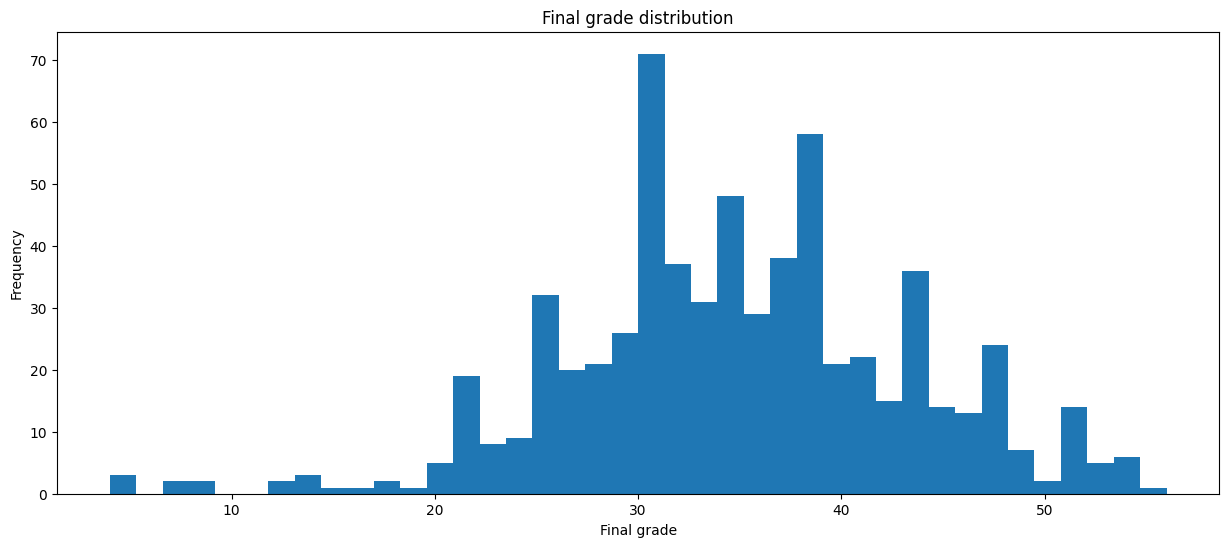

In [59]:
# Histogram plot
plt.figure(figsize=(15,6))
plt.hist(df['total'],bins=40)
plt.title('Final grade distribution')
plt.xlabel('Final grade')
plt.ylabel('Frequency')

#### Correlation plot

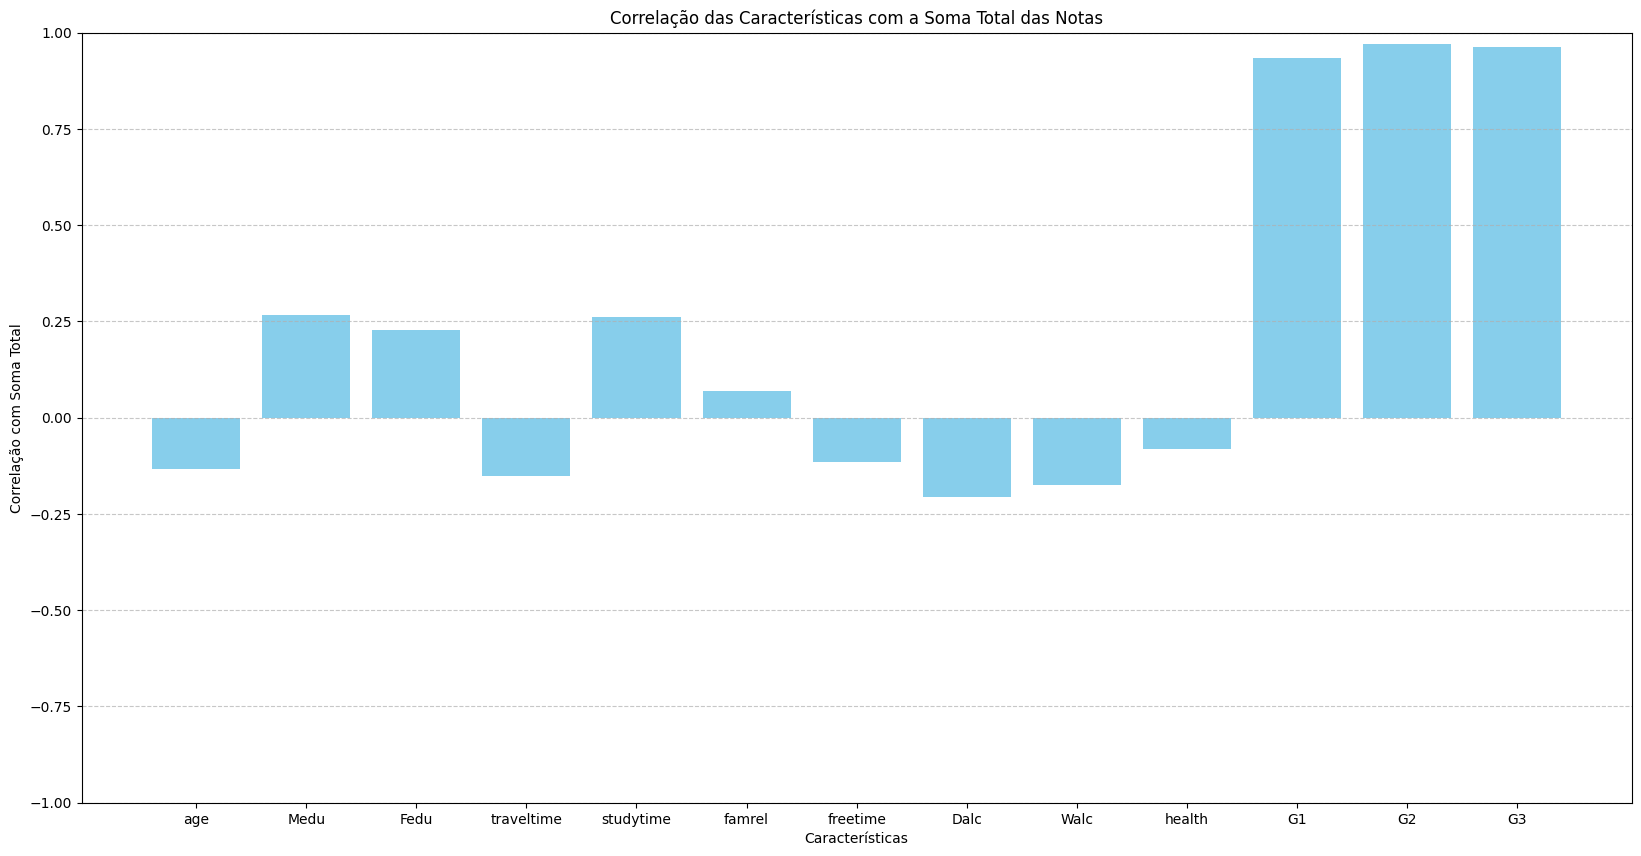

In [62]:

variables = ['age','Medu','Fedu','traveltime','studytime','famrel','freetime','Dalc','Walc','health','G1','G2','G3','total']
corre = df[variables].corr()['total'].drop('total')
plt.figure(figsize=(20, 10))
plt.bar(corre.index, corre.values, color='skyblue')
plt.xlabel('Características')
plt.ylabel('Correlação com Soma Total')
plt.title('Correlação das Características com a Soma Total das Notas')
plt.ylim([-1, 1])  # Ajustar o intervalo dos valores de correlação
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Text(0, 0.5, 'Mean of Final Grade')

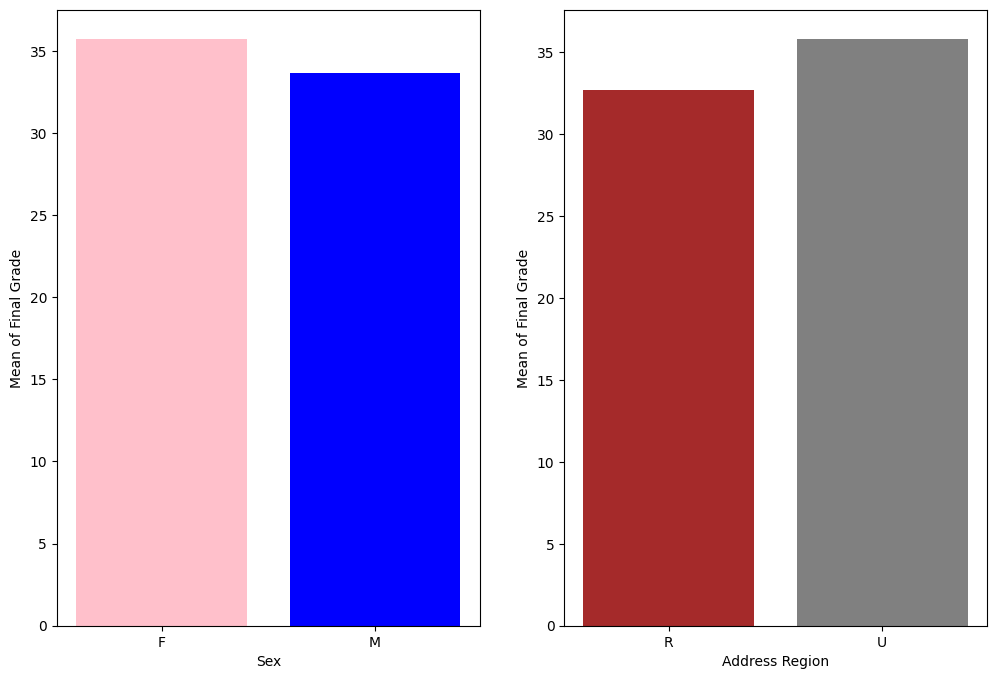

In [85]:
df_groupedS = df.groupby('sex')['total'].mean().reset_index()
df_groupedA = df.groupby('address')['total'].mean().reset_index()
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.bar(df_groupedS['sex'],df_groupedS['total'],color=['pink', 'blue'])
plt.xlabel('Sex')
plt.ylabel('Mean of Final Grade')
plt.subplot(1,2,2)
plt.bar(df_groupedA['address'],df_groupedA['total'],color=['brown', 'gray'])
plt.xlabel('Address Region')
plt.ylabel('Mean of Final Grade')



#### All grades comparasion with final grade

Text(0, 0.5, 'Total')

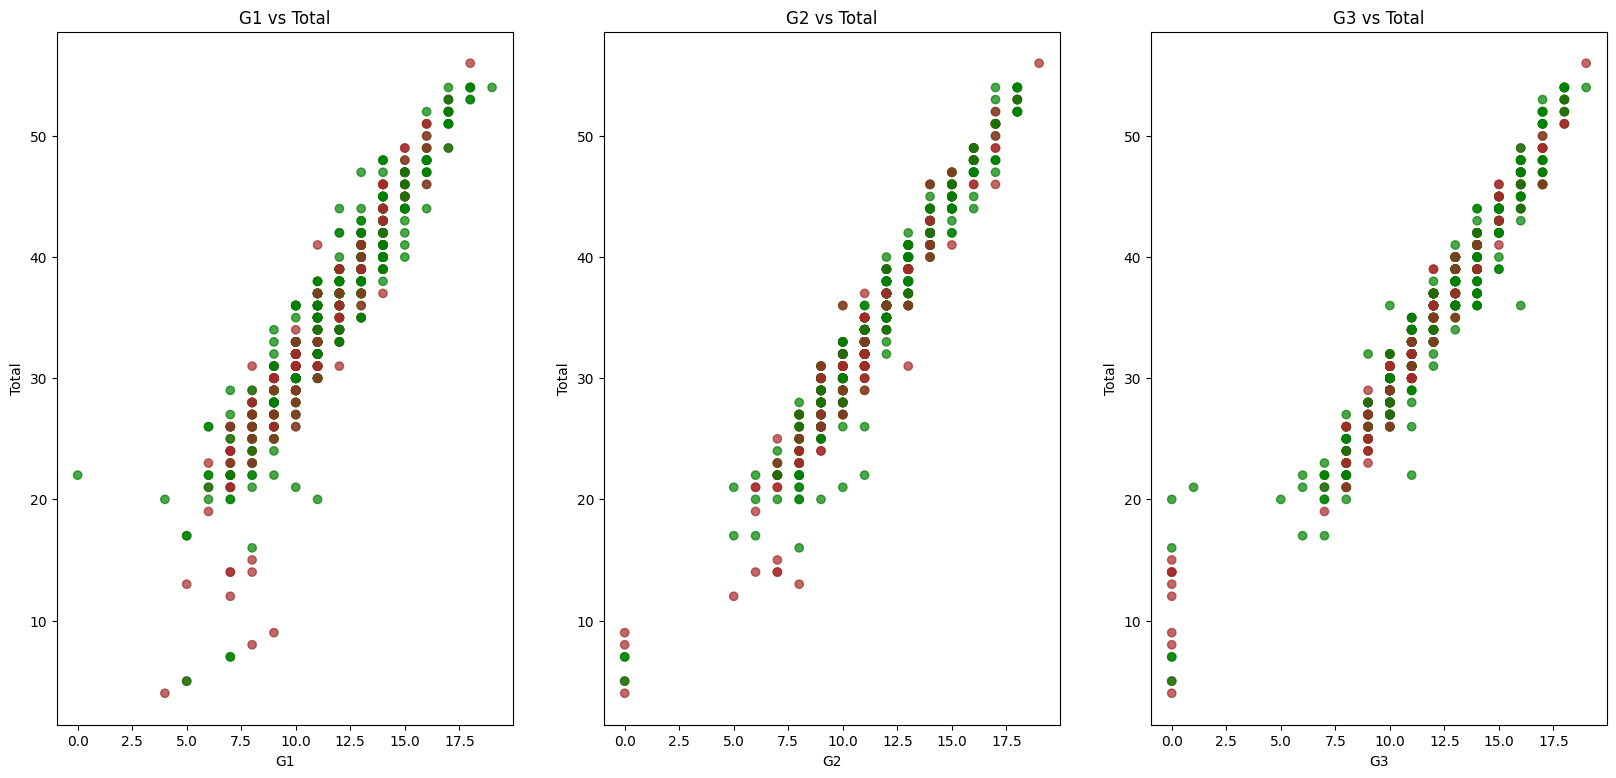

In [89]:
#All grades comparasion with final grade
colors = {'U': 'green', 'R': 'brown','M': 'blue','F': 'pink'}
plt.figure(figsize=(20,9))
plt.subplot(1, 3, 1)
plt.scatter(df['G1'], df['total'], color=df['address'].map(colors), alpha=0.7)
plt.title('G1 vs Total')
plt.xlabel('G1')
plt.ylabel('Total')
plt.subplot(1,3,2)
plt.scatter(df['G2'], df['total'], color=df['address'].map(colors), alpha=0.7)
plt.title('G2 vs Total')
plt.xlabel('G2')
plt.ylabel('Total')
plt.subplot(1,3,3)
plt.scatter(df['G3'], df['total'], color=df['address'].map(colors), alpha=0.7)
plt.title('G3 vs Total')
plt.xlabel('G3')
plt.ylabel('Total')

Text(0, 0.5, 'Total')

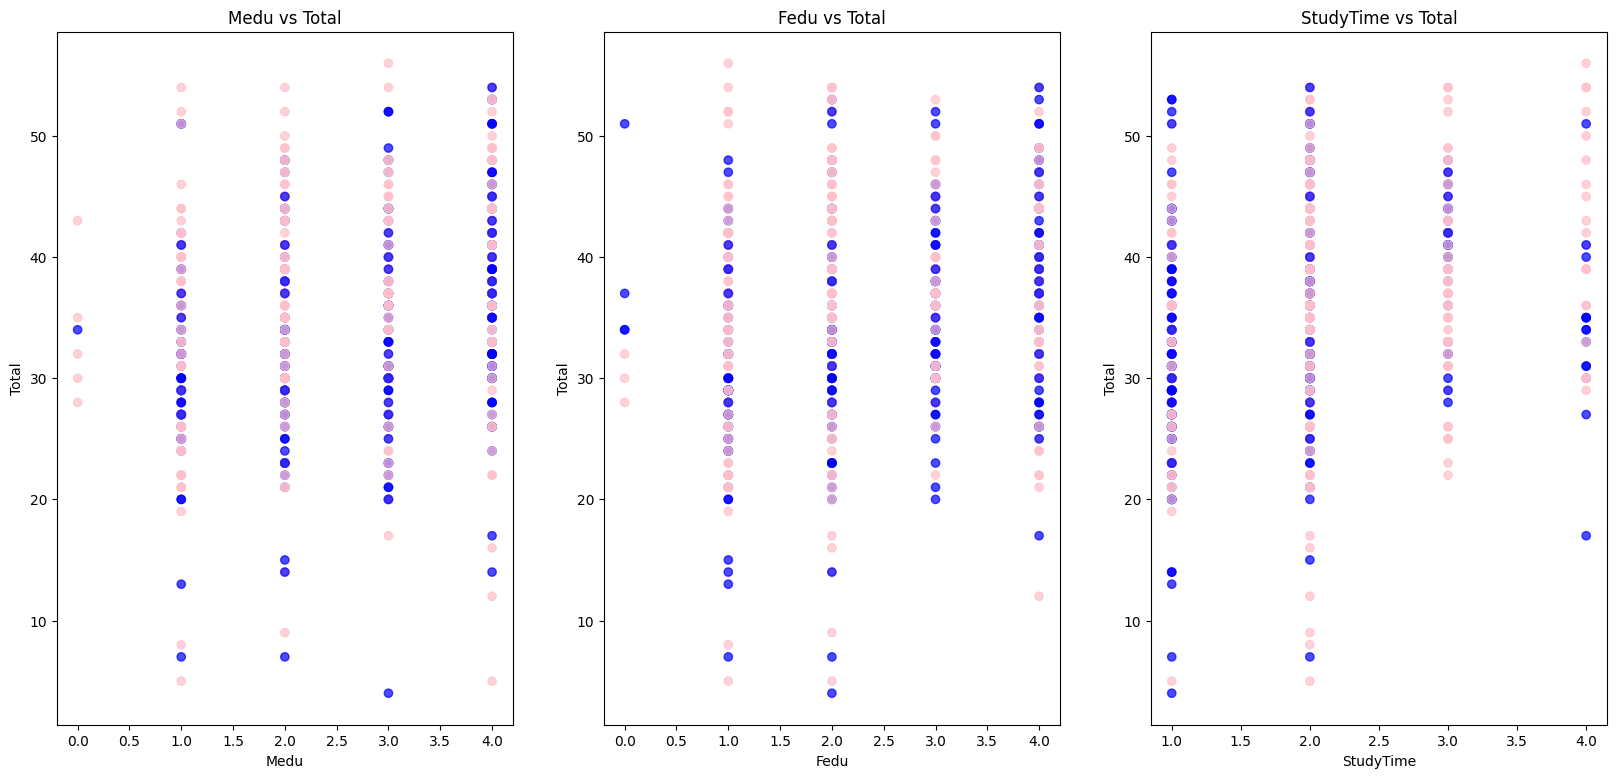

In [98]:
#All grades comparasion with final grade
colorus = {'M': 'blue','F': 'pink'}
plt.figure(figsize=(20,9))
plt.subplot(1, 3, 1)
plt.scatter(df['Medu'], df['total'], color=df['sex'].map(colorus), alpha=0.7)
plt.title('Medu vs Total')
plt.xlabel('Medu')
plt.ylabel('Total')
plt.subplot(1,3,2)
plt.scatter(df['Fedu'], df['total'], color=df['sex'].map(colorus), alpha=0.7)
plt.title('Fedu vs Total')
plt.xlabel('Fedu')
plt.ylabel('Total')
plt.subplot(1,3,3)
plt.scatter(df['studytime'], df['total'], color=df['sex'].map(colorus), alpha=0.7)
plt.title('StudyTime vs Total')
plt.xlabel('StudyTime')
plt.ylabel('Total')